No handles with labels found to put in legend.


Accuracy: 0.6603080446083144
Accuracy: 0.8410141532104956
Accuracy: 0.7853903564275712
Accuracy: 0.7786428178773496
Accuracy: 0.8423433259302987
Accuracy: 0.8868074166525928
Accuracy: 0.7870684665366366
Accuracy: 0.8211530137073095
Accuracy: 0.8142773417480783
Accuracy: 0.8163085889761916
Accuracy: 0.7187474784397758
Accuracy: 0.8805774333722451
Accuracy: 0.7833214547435223
Accuracy: 0.8169522055608329
Accuracy: 0.7151777911200629
Accuracy: 0.7277074650987139
Accuracy: 0.931584967139515
Accuracy: 0.8348137340558481
Accuracy: 0.8505156691685
Accuracy: 0.7767390151632775
-------------------------
Coefficient: 
 [ 0.15814555  0.98268312  0.04411489 -0.31627003 -0.20374308]
Intercept: 
 -1.5794580126804885
-------------------------
8.298827894789067 [8 9 4 0 2] 10
9.28151101334059 [ 8 10  4  0  2] 9
-1.0836683807287733 [7 0 0 0 3] 0
9.278545748664577 [10 10  6  0  4] 11
18.502374387111118 [19 18  0  0  3] 19
5.27062090683215 [7 7 5 3 2] 7
14.276630095554163 [14 14  2  0  1] 14
14.940056843

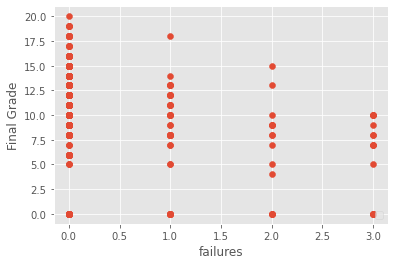

In [27]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv(r"C:\Anaconda3\envs\tensor\student-mat.csv", sep=";")

predict = "G3"

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()